<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-08-22 10:38:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-08-22 10:38:51 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [11]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [12]:
df.shape

(346, 10)

### Convert to date time object 

In [13]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0       --> 2019.5.15-1      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

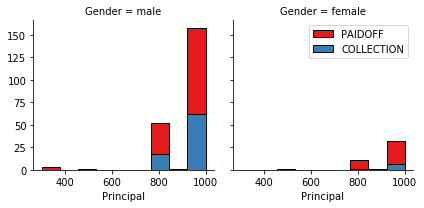

In [15]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

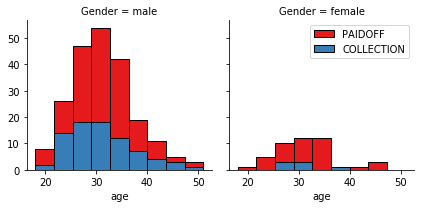

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

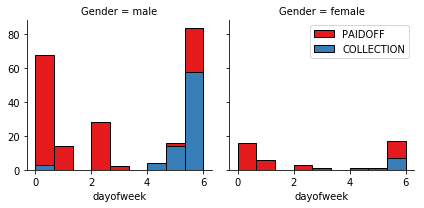

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [21]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [22]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [23]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [24]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [25]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

# Importing essential modules

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.2)

In [28]:
np.unique(y_train_k, return_counts=True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([ 68, 208]))

# Importing metrics from sklearn

We import metrics to use the inbuild accuracy measuring function.
This function is built upon jaccard index and that is what we are being told to do!

In [29]:
from sklearn import metrics

# Building the KNN Classification Model

In [30]:
knnmodel = KNeighborsClassifier(n_neighbors=3).fit(X_train_k, y_train_k)

In [31]:
y_pred_train_k = knnmodel.predict(X_train_k)

Accuracy score between the Actual value of y_train set and the predicted value of y_train set

In [32]:
metrics.accuracy_score(y_train_k, y_pred_train_k)

0.822463768115942

In [33]:
y_pred_test_k = knnmodel.predict(X_test_k)

Accuracy between actual values of y_test set and the predicted value of y_test set, where prediction is done by the KNNClassifier model.

In [34]:
metrics.accuracy_score(y_test_k, y_pred_test_k)

0.7285714285714285

# Finding the best value of K

In order to find the best value of k, we would iterate over range of k values. 

In [35]:
acc_set = []

In [36]:
for i in range(1,10):
    knnmodel = KNeighborsClassifier(n_neighbors=i).fit(X_train_k, y_train_k)
    y_pred_test_k = knnmodel.predict(X_test_k)
    acc_set.append(metrics.accuracy_score(y_test_k, y_pred_test_k))

Accuracy when we select k between 1 to 9. 

In [37]:
for i in range(9):
    print('Accuracy for k = ', (i+1), ' is:- ', acc_set[i])

Accuracy for k =  1  is:-  0.7142857142857143
Accuracy for k =  2  is:-  0.5857142857142857
Accuracy for k =  3  is:-  0.7285714285714285
Accuracy for k =  4  is:-  0.7142857142857143
Accuracy for k =  5  is:-  0.7571428571428571
Accuracy for k =  6  is:-  0.7428571428571429
Accuracy for k =  7  is:-  0.7428571428571429
Accuracy for k =  8  is:-  0.7
Accuracy for k =  9  is:-  0.7714285714285715


Best accuracy and worse accuracy

In [38]:
print('Best accuracy:- ', np.amax(acc_set), ' When K = ', np.argmax(acc_set)+1)
print('Worst accuracy:- ', np.amin(acc_set), ' When K = ', np.argmin(acc_set)+1)

Best accuracy:-  0.7714285714285715  When K =  9
Worst accuracy:-  0.5857142857142857  When K =  2


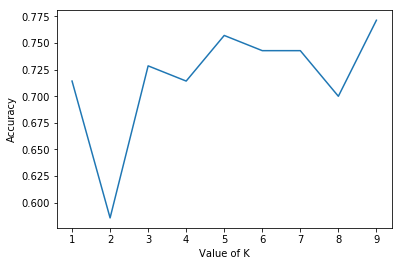

In [39]:
plt.plot(range(1,10), acc_set)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [40]:
knnmodel = KNeighborsClassifier(n_neighbors=(np.argmax(acc_set)+1))

In [41]:
knnmodel.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


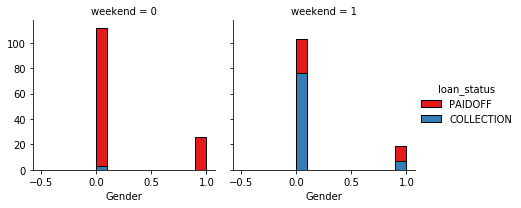

In [44]:
g = sns.FacetGrid(data=df, col='weekend', hue='loan_status', palette='Set1')
g.map(plt.hist, 'Gender', ec='k')
g.add_legend()

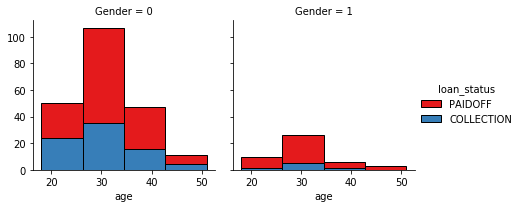

In [45]:
bins = np.linspace(df['age'].min(), df['age'].max(), 5)
g = sns.FacetGrid(data=df, hue='loan_status',col='Gender', palette='Set1')
g.map(plt.hist, 'age', bins=bins, ec='k')
g.add_legend()

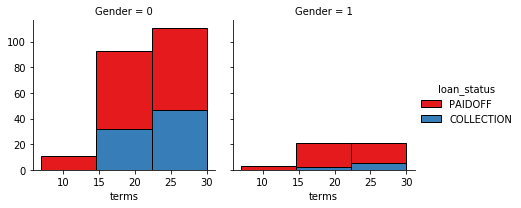

In [46]:
bins = np.linspace(df['terms'].min(), df['terms'].max(), 4)
g = sns.FacetGrid(data=df, hue='loan_status',col='Gender', palette='Set1')
g.map(plt.hist, 'terms', bins=bins, ec='k')
g.add_legend()

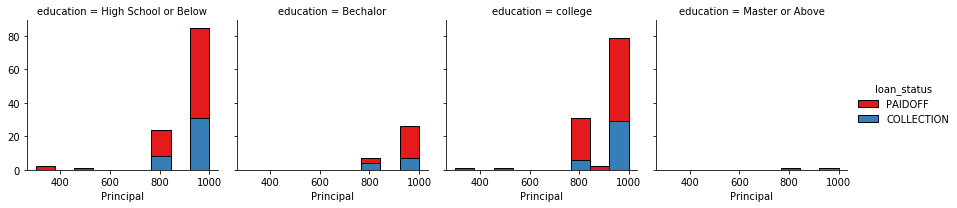

In [47]:
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)
g = sns.FacetGrid(data=df, hue='loan_status', col='education', palette='Set1')
g.map(plt.hist, 'Principal',bins=bins, ec='k')
g.add_legend()

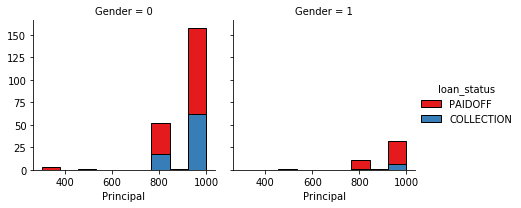

In [48]:
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)
g = sns.FacetGrid(data=df, hue='loan_status', col='Gender', palette='Set1')
g.map(plt.hist, 'Principal',bins=bins, ec='k')
g.add_legend()

After Visualising and analysing the data, I see that each attribute will have it's role to play and hence we will keep all the attributes in the features set.

In [49]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=2)
dectree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
dectree.fit(x_train_d, y_train_d)
y_pred_d1 = dectree.predict(x_test_d)

In [51]:
y_pred_d1

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [52]:
dectree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [53]:
from sklearn import svm

In [54]:
XS = Feature.values
y = df['loan_status']

In [55]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(XS, y, test_size=0.2)

In [56]:
svm_model_rbf = svm.SVC(kernel='rbf')
svm_model_rbf.fit(x_train_s, y_train_s)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred_s = svm_model_rbf.predict(x_test_s)

In [58]:
metrics.accuracy_score(y_test_s, y_pred_s)

0.7428571428571429

Checking for other SVM kernel Functions

In [59]:
svm_model_linear = svm.SVC(kernel='linear')
svm_model_linear.fit(x_train_s, y_train_s)
y_pred_s = svm_model_rbf.predict(x_test_s)
metrics.accuracy_score(y_test_s, y_pred_s)

0.7428571428571429

In [60]:
svm_model_linear = svm.SVC(kernel='sigmoid')
svm_model_linear.fit(x_train_s, y_train_s)
y_pred_s = svm_model_rbf.predict(x_test_s)
metrics.accuracy_score(y_test_s, y_pred_s)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7428571428571429

In [61]:
svm_model_linear.fit(XS, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
svm_model_rbf.fit(XS, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

We see that changing the kernel is not bringing changes about the accuracy.

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
y = df['loan_status']
XL = Feature.values

As we have OvR relationship in our case, and also the dataset is not so large, we will use liblinear as the solver.We will take a strong regularizer for our case, hence minimizing the value of C.

In [65]:
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(XL, y, test_size=0.2)
logreg1 = LogisticRegression(solver='liblinear', C=0.05)
logreg1.fit(x_train_l, y_train_l)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred_l1 = logreg1.predict(x_test_l)

In [67]:
metrics.accuracy_score(y_test_l, y_pred_l1)

0.7714285714285715

In [68]:
logreg2 = LogisticRegression(solver='liblinear', C=0.1)
logreg2.fit(x_train_l, y_train_l)
y_pred_l2 = logreg2.predict(x_test_l)
metrics.accuracy_score(y_test_l, y_pred_l2)

0.7714285714285715

Hence, here we observer that the accuracy of the model is not changn with the change in the value of C.
Therefore, we will take C as 0.05 and make it our final decision making model.

In [69]:
logreg = LogisticRegression(solver='liblinear', C=0.05)
logreg.fit(x_train_l, y_train_l)
y_pred_l1 = logreg2.predict(x_test_l)
metrics.accuracy_score(y_test_l, y_pred_l1)

0.7714285714285715

# Model Evaluation using Test set

In [70]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

We will have to clean the data to feed it to our model so that it can judge the outcome of the input values.

First, download and load the test set:

In [71]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-08-22 10:45:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-08-22 10:45:46 (708 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [72]:
#path = 'D:/ML/Coursera/Datasets/loan_test.csv'
tdf = pd.read_csv('loan_test.csv')

### Load Test set for evaluation 

In [73]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [74]:
tdf['effective_date'] = pd.to_datetime(tdf['effective_date'])
tdf['due_date'] = pd.to_datetime(tdf['due_date'])

In [75]:
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [76]:
tdf['day'] = tdf['effective_date'].dt.dayofweek

In [77]:
tdf['weekend'] = tdf['day'].apply(lambda x: 1 if (x>3) else 0)

In [78]:
tdf.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [79]:
test_features = tdf[['Principal', 'terms', 'age', 'Gender', 'weekend', 'education']]

In [80]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [81]:
test_features.head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,50,female,0,Bechalor
1,300,7,35,male,1,Master or Above
2,1000,30,43,female,1,High School or Below
3,1000,30,26,male,1,college
4,800,15,29,male,1,Bechalor


In [82]:
test_features = pd.concat([test_features, pd.get_dummies(tdf['education'])], axis=1)

In [83]:
test_features.head()

,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,female,0,Bechalor,1,0,0,0
1,300,7,35,male,1,Master or Above,0,0,1,0
2,1000,30,43,female,1,High School or Below,0,1,0,0
3,1000,30,26,male,1,college,0,0,0,1
4,800,15,29,male,1,Bechalor,1,0,0,0


In [84]:
test_features.drop(['Master or Above'], axis=1, inplace=True)
test_features.drop(['education'], axis=1, inplace=True)

In [85]:
test_features['Gender'] = test_features['Gender'].map({'male': 0, 'female' : 1})

In [86]:
test_features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [87]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [88]:
test_values = test_features.values

Standardizing the features matrix(Dataframe)

In [89]:
test_values = preprocessing.StandardScaler().fit(test_values).transform(test_values)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [90]:
tdf.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day,weekend
49,348,348,COLLECTION,1000,30,2016-09-11,2016-10-10,32,High School or Below,male,6,1
50,349,349,COLLECTION,800,15,2016-09-11,2016-09-25,29,college,male,6,1
51,369,369,COLLECTION,1000,30,2016-09-11,2016-10-10,37,High School or Below,male,6,1
52,370,370,COLLECTION,800,15,2016-09-11,2016-09-25,36,High School or Below,male,6,1
53,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male,0,0


In [91]:
test_values[-5:]

array([[ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 0.49362588,  0.92844966,  0.87022365, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [-0.66532184, -0.78854628,  0.70179327, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966,  0.19650211, -0.50578054, -1.30384048,
        -0.41702883,  1.25356634, -0.86135677]])

In [92]:
y_test = tdf['loan_status']
y_test[:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

# Predicting the values using our Models

Using KNN Model

In [93]:
y_pred_k = knnmodel.predict(test_values)

In [94]:
y_pred_k[:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION'],
      dtype=object)

Using Decision Tree

In [95]:
y_pred_d = dectree.predict(test_values)

In [96]:
y_pred_d[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Using Support Vector Machine

In [97]:
y_pred_s = svm_model_linear.predict(test_values)

In [98]:
y_pred_s[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Using Logistic Regression

In [99]:
y_pred_l = logreg1.predict(test_features.values)

In [100]:
y_pred_l[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Jaccard score FOR DECISION TREE

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

# Finding the f1 Scores

In [101]:
report = pd.concat([pd.Series(y_test, name='actual_value'), pd.Series(y_pred_k, name='knn'), pd.Series(y_pred_d, name='dec'), pd.Series(y_pred_s, name='SVM'), pd.Series(y_pred_l, name='log')], axis=1)

In [102]:
report['knn'].value_counts()

PAIDOFF       46
COLLECTION     8
Name: knn, dtype: int64

In [103]:
map_ans = {'PAIDOFF' : 1, 'COLLECTION' : 0}
report['actual_value'] = report['actual_value'].map(map_ans)
report['knn'] = report['knn'].map(map_ans)
report['dec'] = report['dec'].map(map_ans)
report['SVM'] = report['SVM'].map(map_ans)
report['log'] = report['log'].map(map_ans)

In [104]:
report.tail()

,actual_value,knn,dec,SVM,log
49,0,1,1,1,1
50,0,1,1,1,1
51,0,0,1,1,1
52,0,0,1,1,1
53,0,1,1,1,1


F1 Score for KNN Model

In [105]:
f1_knn = f1_score(report['actual_value'].values, report['knn'].values)
f1_knn

0.813953488372093

F1 score for Logistic Regression

In [106]:
f1_log = f1_score(report['actual_value'].values, report['log'].values)
f1_log

0.851063829787234

F1 score for Decision Tree

In [107]:
f1_dec = f1_score(report['actual_value'].values, report['dec'].values)
f1_dec

0.851063829787234

F1 Score for Support Vector Machine

In [108]:
f1_svm = f1_score(report['actual_value'].values, report['SVM'].values)
f1_svm

0.851063829787234

# Finding Jaccard Scores

Jaccard score for KNN

In [109]:
jaccard_knn = jaccard_similarity_score(report['actual_value'], report['knn'])
jaccard_knn

0.7037037037037037

Jaccard score for Decision Tree

In [110]:
jaccard_dec = jaccard_similarity_score(report['actual_value'], report['dec'])
jaccard_dec

0.7407407407407407

Jaccard Score for SVM

In [111]:
jaccard_svm = jaccard_similarity_score(report['actual_value'], report['SVM'])
jaccard_svm

0.7407407407407407

Jaccard Score for Logistic Regression

In [112]:
jaccard_log = jaccard_similarity_score(report['actual_value'], report['log'])
jaccard_log

0.7407407407407407


# Finding the log-loss for Logistic Regression Model

In [113]:
logloss_logreg = log_loss(y_test, logreg.predict_log_proba(test_features))
logloss_logreg

0.6931471805599455

# Plotting the Values in a table

In [114]:
index = pd.Series(['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], name='Algorithm')

In [115]:
cols = ['Algorithm', 'Jaccard', 'F1-Score', 'LogLoss']
Result = {'Algorithm' : ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
                     'Jaccard' : [jaccard_knn, jaccard_dec, jaccard_svm, jaccard_log],
                     'F1-Score' : [f1_knn, f1_dec, f1_svm, f1_log],
                     'LogLoss' : [np.nan, np.nan, np.nan, logloss_logreg]}

In [116]:
Result = pd.DataFrame(Result)

In [117]:
Result.head()

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,0.703704,0.813953,NaN
1,Decision Tree,0.740741,0.851064,NaN
2,SVM,0.740741,0.851064,NaN
3,LogisticRegression,0.740741,0.851064,0.693147


In [118]:
Result

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,0.703704,0.813953,NaN
1,Decision Tree,0.740741,0.851064,NaN
2,SVM,0.740741,0.851064,NaN
3,LogisticRegression,0.740741,0.851064,0.693147


# Plotting the graph for accuracy

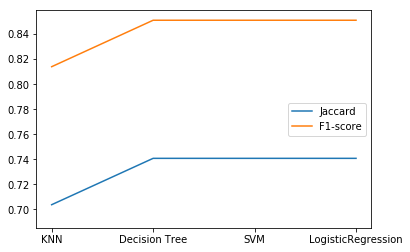

In [119]:
plt.plot(Result['Algorithm'], Result['Jaccard'])
plt.plot(Result['Algorithm'], Result['F1-Score'])
plt.plot(Result['Algorithm'], Result['LogLoss'])
plt.legend(['Jaccard', 'F1-score'])

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>